In [1]:
from google.colab import files
uploaded=files.upload()


Saving US_Accident.xlsx to US_Accident.xlsx


In [2]:
import pandas as pd
import numpy as np
df=pd.read_excel("US_Accident.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 4499 non-null   object        
 1   Source             4499 non-null   object        
 2   Severity           4499 non-null   int64         
 3   Start_Time         4499 non-null   datetime64[ns]
 4   End_Time           4499 non-null   datetime64[ns]
 5   Start_Lat          4499 non-null   float64       
 6   Start_Lng          4499 non-null   float64       
 7   End_Lat            0 non-null      float64       
 8   End_Lng            0 non-null      float64       
 9   Distance(mi)       4499 non-null   float64       
 10  Description        4499 non-null   object        
 11  Street             4499 non-null   object        
 12  City               4499 non-null   object        
 13  County             4499 non-null   object        
 14  State   

In [4]:
df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,4499
End_Lng,4499
Distance(mi),0


In [5]:
# Select relevant columns
cols = [
    'ID', 'Severity', 'Start_Time', 'End_Time',
    'Start_Lat', 'Start_Lng',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Direction',
    'Distance(mi)','City'
]
US_Accident = df[cols]

# Convert time to datetime
US_Accident['Start_Time'] = pd.to_datetime(US_Accident['Start_Time'])
US_Accident['End_Time'] = pd.to_datetime(US_Accident['End_Time'])

# Extract time of day
US_Accident['Hour'] = US_Accident['Start_Time'].dt.hour

US_Accident.head()


/tmp/ipython-input-5-966192859.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accident['Start_Time'] = pd.to_datetime(US_Accident['Start_Time'])
/tmp/ipython-input-5-966192859.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accident['End_Time'] = pd.to_datetime(US_Accident['End_Time'])
/tmp/ipython-input-5-966192859.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Distance(mi),City,Hour
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,91.0,29.68,10.0,Calm,0.01,Dayton,5
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,100.0,29.65,10.0,Calm,0.01,Reynoldsburg,6
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,100.0,29.67,10.0,SW,0.01,Williamsburg,6
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,96.0,29.64,9.0,SW,0.01,Dayton,7
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,89.0,29.65,6.0,SW,0.01,Dayton,7


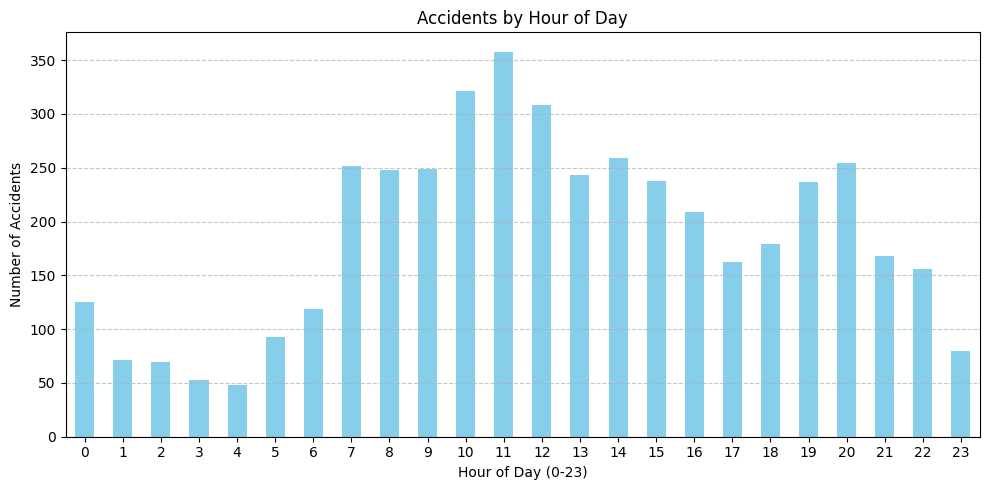

In [6]:
#Analyze Accidents by Time of Day
import matplotlib.pyplot as plt

# Plot number of accidents by hour
plt.figure(figsize=(10, 5))
US_Accident['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


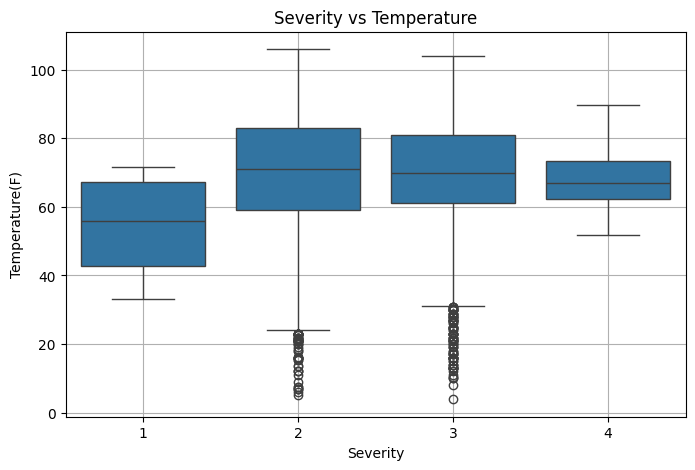

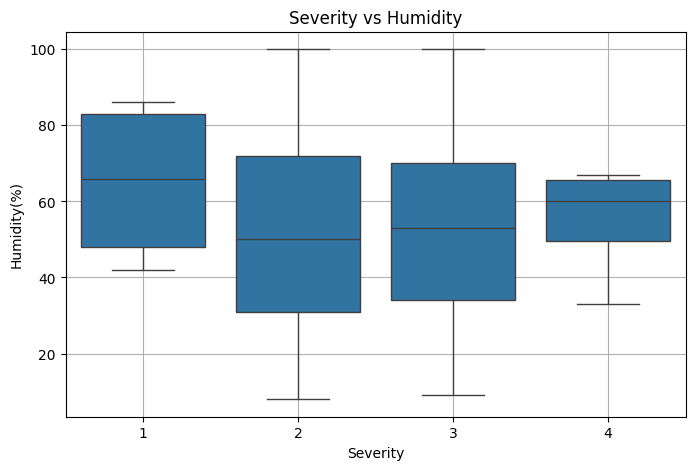

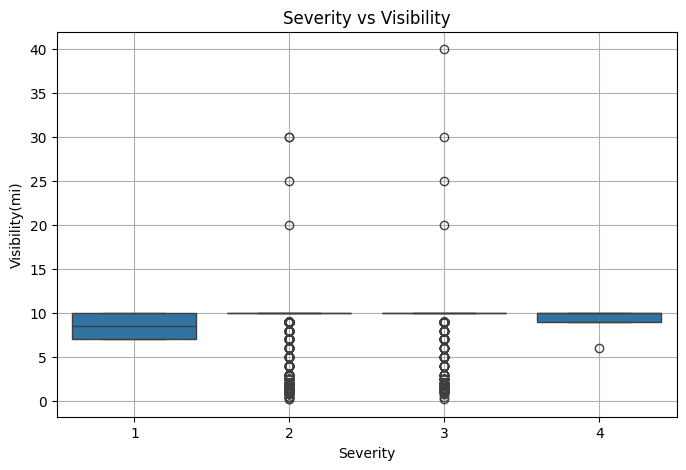

In [7]:
#Analyze Weather Factors vs Severity
import seaborn as sns
import matplotlib.pyplot as plt

# Plot severity vs temperature
plt.figure(figsize=(8, 5))
sns.boxplot(data=US_Accident, x='Severity', y='Temperature(F)')
plt.title('Severity vs Temperature')
plt.grid(True)
plt.show()

# Plot severity vs humidity
plt.figure(figsize=(8, 5))
sns.boxplot(data=US_Accident, x='Severity', y='Humidity(%)')
plt.title('Severity vs Humidity')
plt.grid(True)
plt.show()

# Plot severity vs visibility
plt.figure(figsize=(8, 5))
sns.boxplot(data=US_Accident, x='Severity', y='Visibility(mi)')
plt.title('Severity vs Visibility')
plt.grid(True)
plt.show()


In [8]:
#Visualize Accident Hotspots
import folium
from folium.plugins import HeatMap

# Filter non-null lat/lng
map_data = US_Accident[['Start_Lat', 'Start_Lng']].dropna()

# Limit to 5000 or less
sample_size = min(5000, len(map_data))
map_data = map_data.sample(n=sample_size, random_state=42)

# Create base map centered in the US
base_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add heatmap
HeatMap(data=map_data).add_to(base_map)

# Show map
base_map


In [9]:
# Accidents by hour
hourly_counts = US_Accident['Hour'].value_counts().sort_index()

# Top 10 cities with highest number of accidents
top_cities = US_Accident['City'].value_counts().head(10)

# Severity distribution
severity_dist = US_Accident['Severity'].value_counts().sort_index()

hourly_counts, top_cities, severity_dist


(Hour
 0     125
 1      71
 2      69
 3      53
 4      48
 5      93
 6     119
 7     252
 8     248
 9     249
 10    321
 11    358
 12    308
 13    243
 14    259
 15    238
 16    209
 17    162
 18    179
 19    237
 20    254
 21    168
 22    156
 23     80
 Name: count, dtype: int64,
 City
 Sacramento       508
 Dayton           321
 San Jose         225
 Columbus         170
 Oakland          136
 San Francisco    117
 Stockton         109
 Tracy            107
 Hayward           82
 Pleasanton        80
 Name: count, dtype: int64,
 Severity
 1       4
 2    2650
 3    1841
 4       4
 Name: count, dtype: int64)

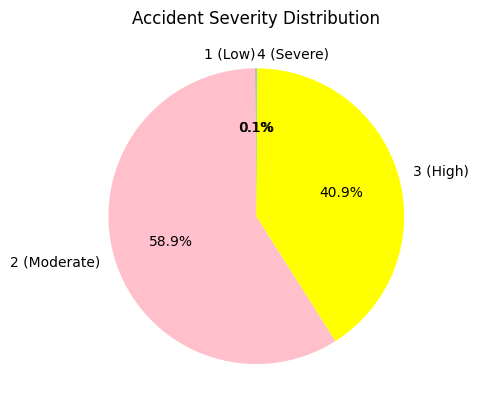

In [10]:
#Severity Distribution
import matplotlib.pyplot as plt

# Plot severity distribution
US_Accident['Severity'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=['green','pink','yellow','skyblue'],
    labels=['1 (Low)', '2 (Moderate)', '3 (High)', '4 (Severe)']
)
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.show()


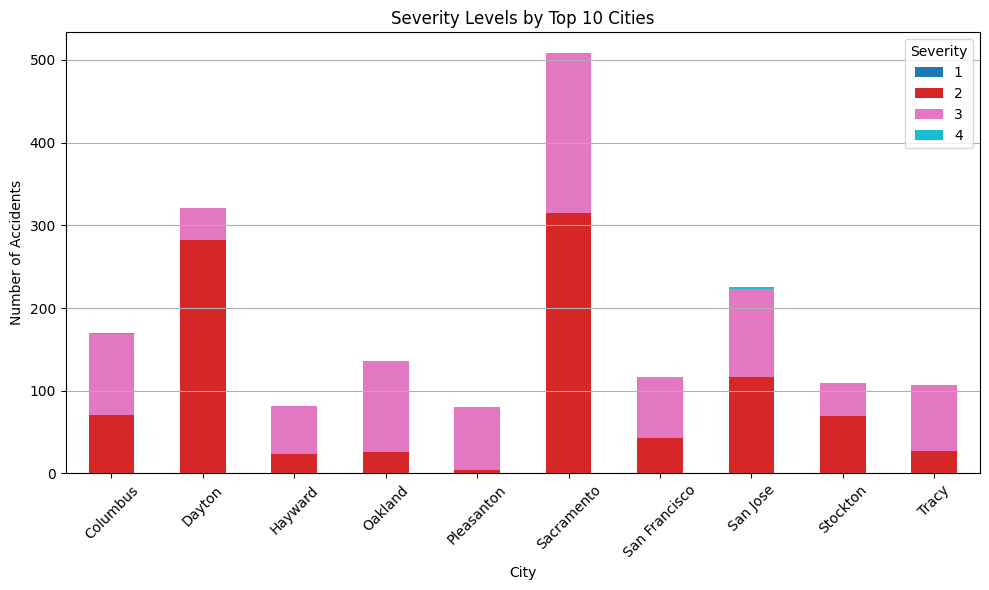

In [11]:
#Severity by City — Find which cities have the most serious accidents
# Get top 10 cities with most accidents
top_cities = US_Accident['City'].value_counts().head(10).index

# Filter data for those cities
city_severity = US_Accident[US_Accident['City'].isin(top_cities)]

# Group by City and Severity
plot_data = city_severity.groupby(['City', 'Severity']).size().unstack()

# Plot stacked bar chart
plot_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab10')
plt.title('Severity Levels by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


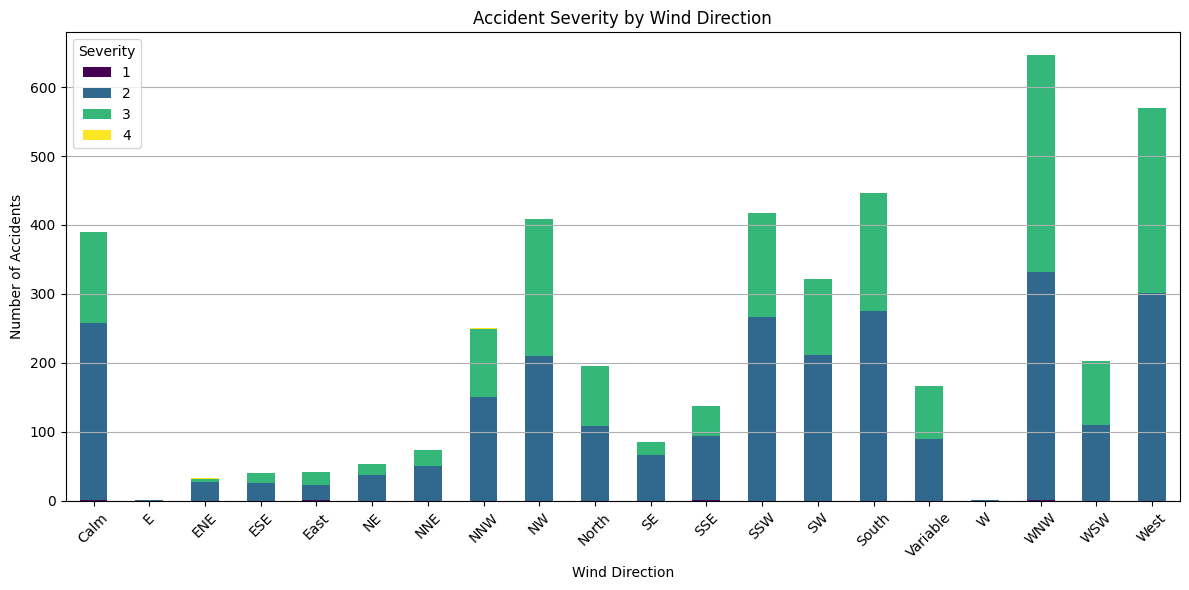

In [12]:
import matplotlib.pyplot as plt

# Drop missing values for Wind_Direction
wind_data = US_Accident.dropna(subset=['Wind_Direction'])

# Group by Wind_Direction and Severity
wind_severity = wind_data.groupby(['Wind_Direction', 'Severity']).size().unstack().fillna(0)

# Sort wind directions alphabetically (optional)
wind_severity = wind_severity.sort_index()

# Plot stacked bar chart
wind_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Accident Severity by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-311138360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accident['Month'] = US_Accident['Start_Time'].dt.month_name()


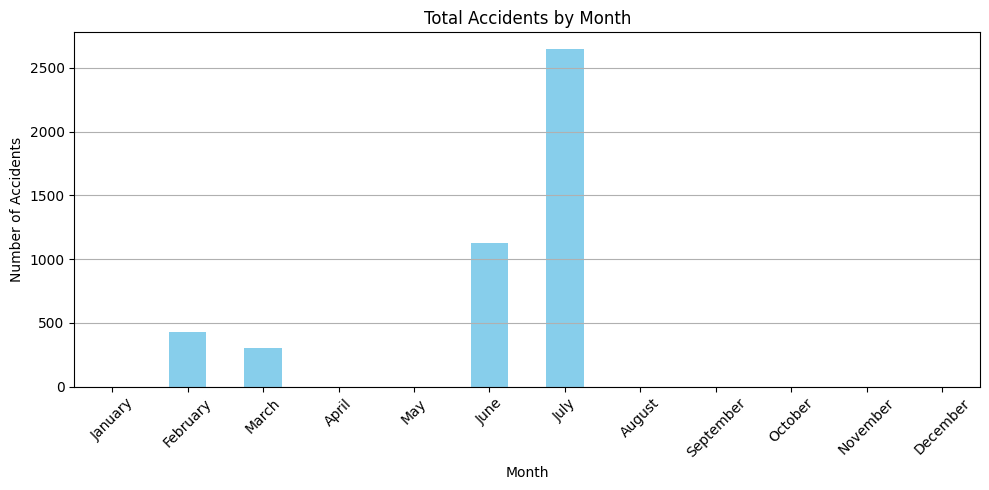

In [13]:
#Seasonal Pattern – Accidents by Month
# Extract month name from Start_Time
US_Accident['Month'] = US_Accident['Start_Time'].dt.month_name()

# Order the months properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and count accidents
monthly_counts = US_Accident['Month'].value_counts().reindex(month_order)

# Plot
monthly_counts.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Total Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

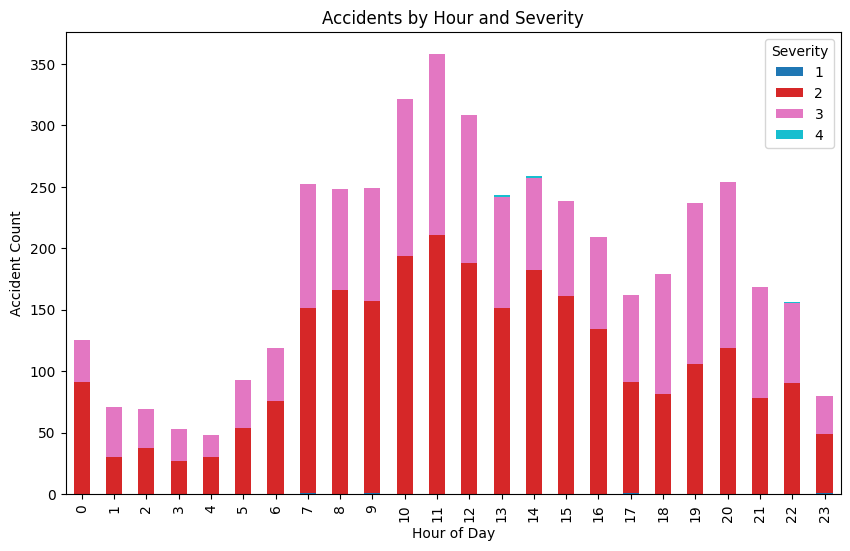

In [14]:
#severity by hours
top_hours=US_Accident['Hour'].value_counts().head(10)
hours_sverity=US_Accident.groupby(['Hour','Severity']).size().unstack()
plt.figure(figsize=(10,6))
hours_sverity.plot(kind='bar',stacked=True, figsize=(10,6), colormap='tab10')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Hour and Severity')
plt.show()

In [15]:
US_Accident.groupby(['City','Severity']).size()

City        Severity
Acampo      2           10
Akron       2            4
            3           11
Alamo       2            3
            3           17
                        ..
Woodside    2            1
Xenia       2            1
Yountville  2            2
Yuba City   2            1
Zanesville  3            1
Length: 450, dtype: int64

In [16]:
US_Accident.groupby(['City', 'Severity']).size().unstack(fill_value=0)

Severity,1,2,3,4
City,,,,
Acampo,0,10,0,0
Akron,0,4,11,0
Alamo,0,3,17,0
Alta,0,0,1,0
Alviso,0,2,0,0
...,...,...,...,...
Woodside,0,1,0,0
Xenia,0,1,0,0
Yountville,0,2,0,0


In [17]:
US_Accident['Month'].value_counts().reset_index(name="accident_count")

,Month,accident_count
0,July,2647
1,June,1124
2,February,425
3,March,303


In [18]:
US_Accident.loc[:, 'week_day'] = US_Accident['Start_Time'].dt.day_name()
US_Accident['week_day'].value_counts()

/tmp/ipython-input-18-3639923095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accident.loc[:, 'week_day'] = US_Accident['Start_Time'].dt.day_name()


,count
week_day,
Tuesday,853
Wednesday,812
Thursday,799
Friday,747
Monday,679
Saturday,341
Sunday,268


In [19]:
US_Accident.groupby('week_day')['Severity'].mean()

,Severity
week_day,
Friday,2.435074
Monday,2.341679
Saturday,2.454545
Sunday,2.466418
Thursday,2.416771
Tuesday,2.415006
Wednesday,2.395320


In [20]:
US_Accident.groupby('City')['week_day'].value_counts().groupby(level=0).nlargest(1)

,,,count
City,City,week_day,
Acampo,Acampo,Tuesday,4
Akron,Akron,Wednesday,4
Alamo,Alamo,Tuesday,5
Alta,Alta,Tuesday,1
Alviso,Alviso,Tuesday,1
...,...,...,...
Woodside,Woodside,Friday,1
Xenia,Xenia,Wednesday,1
Yountville,Yountville,Thursday,1
